<a href="https://colab.research.google.com/github/jeswanth2305/5900-project/blob/main/code/5900_project_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [4]:
import time

starting_time = time.time()
data = pd.read_csv('/content/drive/MyDrive/5900 project/RAVTESS_MFCC_Observed.csv')
print("data loaded in " + str(time.time()-starting_time) + "ms")

print(data.head())

data loaded in 0.41253089904785156ms
   Unnamed: 0          0           1          2          3          4  \
0         288 -606.20450   60.358814 -24.344942  12.689716  -4.803007   
1        2018 -497.01166   21.952590 -29.716557   6.589133 -15.976501   
2        4256 -382.86514   75.177330 -18.020714  10.049208 -13.709579   
3        4195 -298.75943   35.738598 -16.441034  33.286182 -11.894375   
4        3340 -450.81780  102.587840   7.047376 -15.194387  -7.608045   

           5          6          7          8  ...        31        32  \
0  -4.511478  -6.793818  -9.193912 -10.548016  ...  7.177325  6.952299   
1 -14.498157 -14.859723 -16.470820 -16.814070  ...  5.530832  0.060323   
2   9.770125 -12.239926  -8.740997 -10.479516  ...  3.934036  4.599089   
3  -2.049213 -15.526284 -16.306858  -5.000370  ...  3.487697  8.761043   
4   6.229052 -22.083948   5.788644 -20.823030  ...  7.322304  4.835584   

         33        34        35        36        37        38        39  \
0  8

In [5]:
data.shape

(5252, 42)

In [6]:
#printing all columns
data.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', 'emotion'],
      dtype='object')

In [7]:
#dropping the column Unnamed: 0 to removed shuffled index
data = data.drop('Unnamed: 0',axis=1)

In [8]:
data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', 'emotion'],
      dtype='object')

In [9]:
#separating features and target outputs
X = data.drop('emotion', axis = 1).values
y = data['emotion'].values

**SVM**

Implementing SVM with Scikit-Learn

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
X.shape, y.shape

((5252, 40), (5252,))

In [12]:
np.unique(y)

array(['angry', 'calm', 'disgust', 'fear', 'happy', 'neutral', 'sad',
       'surprised'], dtype=object)

X variable contains attributes while y variable contains corresponding labels.

Once the data is divided into attributes and labels, the final preprocessing step is to divide data into training and test sets. The model_selection library of the Scikit-Learn library contains the train_test_split method that allows us to divide data into training and test sets.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

It is the time to train our SVM on the training data. Scikit-Learn contains the svm library, which contains built-in classes for different SVM algorithms. Since we are going to perform a classification task, we will use the support vector classifier class, which is written as SVC in the Scikit-Learn's svm library. We have set the kernel to linear.

In [14]:
from sklearn.svm import SVC

svclassifier = SVC(kernel = 'linear')

The fit method of SVC class is called to train the algorithm on the training data, which is passed as a parameter to the fit method. Execute the following code to train the algorithm:

In [15]:
import time

starting_time = time.time()
svclassifier.fit(X_train, y_train)
print("Trained model in %s ms " % str(time.time() - starting_time))

Trained model in 118.1064555644989 ms 


To make predictions, the predict method of the SVC class is used.

In [16]:
y_pred = svclassifier.predict(X_test)

Confusion matrix, precision, recall, and F1 measures are the most commonly used metrics for classification tasks. Scikit-Learn's metrics library contains the classification_report and confusion_matrix methods, which can be readily used to find out the values for these important metrics. We have used the following code for finding these metrics:

              precision    recall  f1-score   support

       angry       0.75      0.80      0.78       152
        calm       0.47      0.71      0.56        69
     disgust       0.68      0.70      0.69       115
        fear       0.58      0.66      0.62       137
       happy       0.68      0.60      0.64       154
     neutral       0.93      0.75      0.83       127
         sad       0.73      0.75      0.74       163
   surprised       0.85      0.68      0.76       134

    accuracy                           0.71      1051
   macro avg       0.71      0.70      0.70      1051
weighted avg       0.72      0.71      0.71      1051

----accuracy score 70.50428163653663 ----


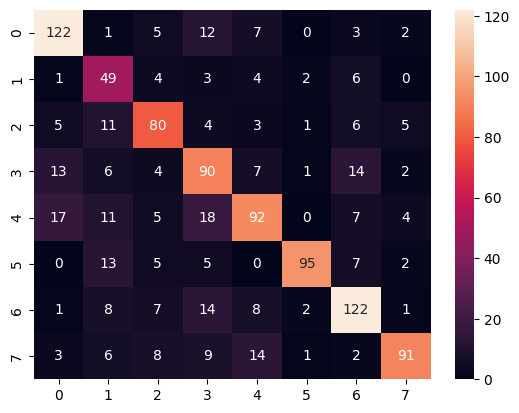

In [17]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn

print(classification_report(y_test,y_pred))

acc = float(accuracy_score(y_test,y_pred))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

Now by calculating the training accuracy and comparing with testing accuracy, we can check for overfitting of data

In [18]:
train_acc = float(svclassifier.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(svclassifier.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)

----train accuracy score 78.1480599857177 ----
----test accuracy score 70.50428163653663 ----


**Cross-Validation**

5-fold cross validation of the dataset with the SVC classifier.

In [19]:
from sklearn.model_selection import cross_val_score

# no. of folds cv = 5
cv_results = cross_val_score(svclassifier, X, y, cv = 5)
print(cv_results)

[0.72597526 0.73073264 0.7352381  0.72190476 0.70190476]


**Scaling**

When performing the linear SVM classification, it is often helpful to normalize the training data, for example by subtracting the mean and dividing by the standard deviation, and afterwards scale the test data with the mean and standard deviation of training data.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC


#splitting dataset into train/ test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set: svc_scaled
svc_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a classifier to the unscaled data
svc_unscaled = SVC(kernel = 'linear').fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(svc_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(svc_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.8325404376784015
Accuracy without Scaling: 0.7278782112274025


**Generalization check**

Checking for overfitting or underfitting by comparing the training and testing scores of the model

In [21]:
train_acc = float(svc_scaled.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(svc_scaled.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)

----train accuracy score 87.45536776957867 ----
----test accuracy score 83.25404376784014 ----


In [22]:
scaled_predictions = svc_scaled.predict(X_test)

**Classification reports and Confusion Matrix**

              precision    recall  f1-score   support

       angry       0.90      0.93      0.91       141
        calm       0.56      0.83      0.67        77
     disgust       0.86      0.82      0.84       109
        fear       0.87      0.80      0.83       169
       happy       0.84      0.81      0.83       169
     neutral       0.99      0.81      0.89       116
         sad       0.83      0.79      0.81       156
   surprised       0.82      0.89      0.85       114

    accuracy                           0.83      1051
   macro avg       0.83      0.83      0.83      1051
weighted avg       0.85      0.83      0.84      1051

----accuracy score 83.25404376784014 ----


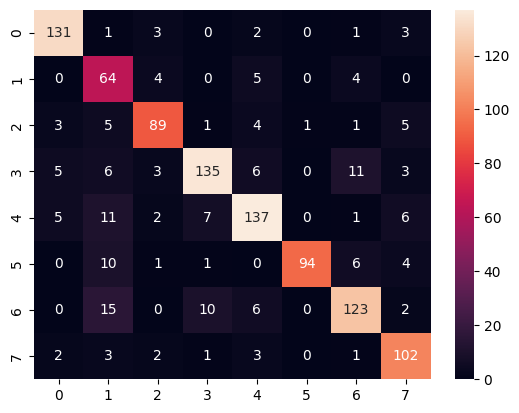

In [23]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn

print(classification_report(y_test,scaled_predictions))

acc = float(accuracy_score(y_test,scaled_predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,scaled_predictions)
df_cm = pd.DataFrame(cm)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

**Cross Validation**

In [24]:
from sklearn.model_selection import cross_val_score

# no. of folds cv = 5
cv_results = cross_val_score(svc_scaled, X, y, cv = 5)
print(cv_results)

[0.83539486 0.83349191 0.83142857 0.82571429 0.83904762]


In [40]:
from joblib import dump

# Save the model
dump(svclassifier, 'svm_model.joblib')



['svm_model.joblib']

In [42]:
from shutil import copyfile

source_path = '/content/svm_model.joblib'
destination_path = '/content/drive/MyDrive/5900 project/svm_model.joblib'

copyfile(source_path, destination_path)


'/content/drive/MyDrive/5900 project/svm_model.joblib'

Predict the audio file

In [26]:
import librosa
from joblib import load

In [27]:
file_path = "/content/drive/MyDrive/5900 project/test files/03-01-05-02-02-01-13.wav"
audio, sr = librosa.load(file_path, sr=None)

In [28]:
mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
mfccs_processed = np.mean(mfccs.T, axis=0)

In [29]:
model = load('svm_model.joblib')

In [30]:
prediction = model.predict(mfccs_processed.reshape(1, -1))
print("Predicted Emotion: ", prediction)

Predicted Emotion:  ['angry']


Predict the recorded file

In [43]:
from IPython.display import HTML, Javascript
from google.colab.output import eval_js
import base64




In [44]:
js = Javascript("""

  async function recordAudio() {

  const div = document.createElement('div');
  const audio = document.createElement('audio');
  const strtButton = document.createElement('button');
  const stopButton = document.createElement('button');

  strtButton.textContent = 'Start Recording';
  stopButton.textContent = 'Stop Recording';

  document.body.appendChild(div);
  div.appendChild(strtButton);
  div.appendChild(audio);

  const stream = await navigator.mediaDevices.getUserMedia({audio:true});
  let recorder = new MediaRecorder(stream);

  audio.style.display = 'block';
  audio.srcObject = stream;
  audio.controls = true;
  audio.muted = true;

  await new Promise((resolve) => strtButton.onclick = resolve);
  strtButton.replaceWith(stopButton);
  recorder.start();

  await new Promise((resolve) => stopButton.onclick = resolve);
  recorder.stop();
  let recData = await new Promise((resolve) => recorder.ondataavailable = resolve);
  let arrBuff = await recData.data.arrayBuffer();
  stream.getAudioTracks()[0].stop();
  div.remove();

  let binaryString = '';
  let bytes = new Uint8Array(arrBuff);
  bytes.forEach((byte) => { binaryString += String.fromCharCode(byte) });

  const url = URL.createObjectURL(recData.data);
  const player = document.createElement('audio');
  player.controls = true;
  player.src = url;
  document.body.appendChild(player);

  return btoa(binaryString);
};


  """)



In [45]:
display(js)
output = eval_js('recordAudio({})')
with open('audio.wav','wb') as file:
  binary = base64.b64decode(output)
  file.write(binary)

print('Recording saved to:',file.name)



file_path = "/content/audio.wav"
audio, sr = librosa.load(file_path, sr=None)

mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
mfccs_processed = np.mean(mfccs.T, axis=0)

model = load('svm_model.joblib')

prediction = model.predict(mfccs_processed.reshape(1, -1))
print("Predicted Emotion: ", prediction)

<IPython.core.display.Javascript object>

Recording saved to: audio.wav
Predicted Emotion:  ['disgust']


<ipython-input-45-5f14b15967b0>:12: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
